# Bài tập 4 - Tổng quan học máy

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 1 2024-2025)*

MSSV: 21850024

Họ và tên: Nguyễn Minh Tư

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bộ dữ liệu `Breast Cancer Wisconsin (Original)`

Bộ dữ liệu `Breast Cancer Wisconsin (Original)`: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original.

Download tập tin dữ liệu `breast+cancer+wisconsin+original.zip` (https://archive.ics.uci.edu/static/public/15/breast+cancer+wisconsin+original.zip), lấy ra tập tin `breast-cancer-wisconsin.data` nạp dữ liệu và bỏ cột (biến) `Sample code number`

In [10]:
# Định nghĩa tên cột, như đã được mô tả trong thông tin của tập dữ liệu
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
    "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
    "Normal Nucleoli", "Mitoses", "Class"
]

# Nạp dữ liệu từ tập tin
data = pd.read_csv("breast-cancer-wisconsin.data", header=None, names=column_names)

# Loại bỏ cột 'Sample code number'
data = data.drop("Sample code number", axis=1)

# Hiển thị dữ liệu sau khi loại bỏ cột
print(data.head())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2       

### Yêu cầu 1 (3 đ)

Phân tích dự đoán ung thư (biến `class` là 4 - malignant) theo các biến khác.

Dùng ít nhất 2 mô hình phân lớp khác nhau từ thư viện scikit-learn.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Thay thế giá trị '?' trong cột 'Bare Nuclei' và chuyển thành kiểu số
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')
data = data.dropna()  # Bỏ các dòng có giá trị NaN

# Chuyển biến 'Class' thành nhị phân: 1 (malignant), 0 (benign)
data['Class'] = data['Class'].apply(lambda x: 1 if x == 4 else 0)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Mô hình Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# 2. Mô hình Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.9560975609756097
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

Random Forest Classifier:
Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       127
           1       0.97      0.90      0.93        78

    accuracy                           0.95       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



### Yêu cầu 2 (3 đ)

Ta thấy rằng tỉ lệ mẫu ung thư (class là 4 - malignant) thấp hơn đáng kể so với mẫu lành tính (2 - benign), vấn đề này được gọi là **mất cân bằng lớp** (class imbalance).

1. Tìm hiểu vấn đề mất cân bằng lớp.

2. Tìm hiểu thư viện imbalanced-learn (https://imbalanced-learn.org/stable/index.html) là thư viện hỗ trợ các kĩ thuật giải quyết vấn đề mất cân bằng lớp.

3. Chọn 1 thuật toán **tăng mẫu** (over-sampling) và 1 thuật toán **giảm mẫu** (under-sampling) từ thư viện imbalanced-learn để thực hiện lại Yêu cầu 1 và so sánh các kết quả.

1. Tìm hiểu vấn đề mất cân bằng lớp:

Mất cân bằng lớp xảy ra khi số lượng mẫu giữa các lớp trong tập dữ liệu phân loại không đồng đều, ví dụ như trong bài toán phân loại ung thư, số lượng mẫu của lớp lành tính (benign) lớn hơn đáng kể so với mẫu ác tính (malignant). 
Điều này có thể gây ra những vấn đề sau:

- Sai lệch mô hình: Mô hình có xu hướng thiên vị về lớp có nhiều mẫu hơn.
- Giảm hiệu suất trên lớp thiểu số: Các mô hình phân loại truyền thống có thể bỏ qua hoặc nhận diện kém với lớp thiểu số (ở đây là lớp ác tính).
- Đánh giá không chính xác: Chỉ số độ chính xác (accuracy) có thể cao nhưng không phản ánh đúng chất lượng phân loại của mô hình.

2. Tìm hiểu thư viện imbalanced-learn (https://imbalanced-learn.org/stable/index.html) là thư viện hỗ trợ các kĩ thuật giải quyết vấn đề mất cân bằng lớp.

imbalanced-learn là một thư viện Python chuyên hỗ trợ các kỹ thuật xử lý mất cân bằng lớp trong học máy, cung cấp các phương pháp:

- Tăng mẫu (Over-sampling): Tạo thêm mẫu mới cho lớp thiểu số để cân bằng với lớp đa số. Các kỹ thuật phổ biến bao gồm:
    - SMOTE (Synthetic Minority Over-sampling Technique): Tạo các mẫu giả bằng cách nội suy giữa các mẫu hiện có trong lớp thiểu số.
    - RandomOverSampler: Tăng mẫu bằng cách sao chép ngẫu nhiên các mẫu từ lớp thiểu số.
- Giảm mẫu (Under-sampling): Giảm số lượng mẫu của lớp đa số để tương đương với lớp thiểu số, bao gồm:
    - RandomUnderSampler: Lấy mẫu ngẫu nhiên từ lớp đa số để giảm kích thước của nó.
    - NearMiss: Lựa chọn các mẫu của lớp đa số gần với lớp thiểu số dựa trên khoảng cách.

In [8]:
pip install imbalanced-learn

     -------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Định nghĩa tên cột và nạp dữ liệu
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
    "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", 
    "Normal Nucleoli", "Mitoses", "Class"
]
data = pd.read_csv("breast-cancer-wisconsin.data", header=None, names=column_names)

# Loại bỏ cột không cần thiết và xử lý dữ liệu thiếu
data = data.drop("Sample code number", axis=1)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')
data = data.dropna()  # Loại bỏ các hàng chứa giá trị NaN

# Chuyển biến 'Class' thành nhị phân: 1 (malignant), 0 (benign)
data['Class'] = data['Class'].apply(lambda x: 1 if x == 4 else 0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tăng mẫu với SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Giảm mẫu với RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Huấn luyện và đánh giá mô hình sau khi tăng mẫu với SMOTE
print("Kết quả với SMOTE (Over-sampling):")

# Logistic Regression
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_log_reg_smote = log_reg_smote.predict(X_test)
print("Logistic Regression with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_smote))
print(classification_report(y_test, y_pred_log_reg_smote))

# Random Forest
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test)
print("Random Forest with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

# Huấn luyện và đánh giá mô hình sau khi giảm mẫu với RandomUnderSampler
print("Kết quả với RandomUnderSampler (Under-sampling):")

# Logistic Regression
log_reg_rus = LogisticRegression(max_iter=1000)
log_reg_rus.fit(X_train_rus, y_train_rus)
y_pred_log_reg_rus = log_reg_rus.predict(X_test)
print("Logistic Regression with RandomUnderSampler:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_rus))
print(classification_report(y_test, y_pred_log_reg_rus))

# Random Forest
rf_rus = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rus.fit(X_train_rus, y_train_rus)
y_pred_rf_rus = rf_rus.predict(X_test)
print("Random Forest with RandomUnderSampler:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_rus))
print(classification_report(y_test, y_pred_rf_rus))


Kết quả với SMOTE (Over-sampling):
Logistic Regression with SMOTE:
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       127
           1       0.96      0.95      0.95        78

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205

Random Forest with SMOTE:
Accuracy: 0.9658536585365853
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       127
           1       0.96      0.95      0.95        78

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205

Kết quả với RandomUnderSampler (Under-sampling):
Logistic Regression with RandomUnderSampler:
Accuracy: 0.9512195121951219
              precision    recall  f1-score   support

           0     

SMOTE (Over-sampling): Bổ sung mẫu cho lớp ác tính (malignant), giúp mô hình có thêm dữ liệu để học tốt hơn về lớp thiểu số. Thông thường, SMOTE giúp tăng độ nhạy (recall) trên lớp thiểu số vì đã có nhiều mẫu đại diện hơn cho lớp này.

RandomUnderSampler (Under-sampling): Giảm số mẫu của lớp lành tính (benign) để cân bằng với lớp ác tính, giúp mô hình học đồng đều trên cả hai lớp. Tuy nhiên, giảm mẫu có thể dẫn đến mất một số thông tin từ lớp đa số, ảnh hưởng đến độ chính xác của mô hình.

Kết quả phân loại có thể so sánh được qua các chỉ số Precision, Recall, và F1-Score.

## Bộ dữ liệu MNIST

Trang dữ liệu: https://yann.lecun.com/exdb/mnist/

Tham khảo: https://en.wikipedia.org/wiki/MNIST_database

Nạp bộ dữ liệu bằng sklearn.

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [17]:
X, y = mnist.data, mnist.target

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [18]:
print(y[0])
print(X[0])

5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0 

In [19]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Hàm vẽ một ảnh (một digit)

In [20]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.xticks([])
    plt.yticks([])

Vẽ ngẫu nhiên các ảnh và nhãn tương ứng. (Nhãn được lưu là chuỗi)

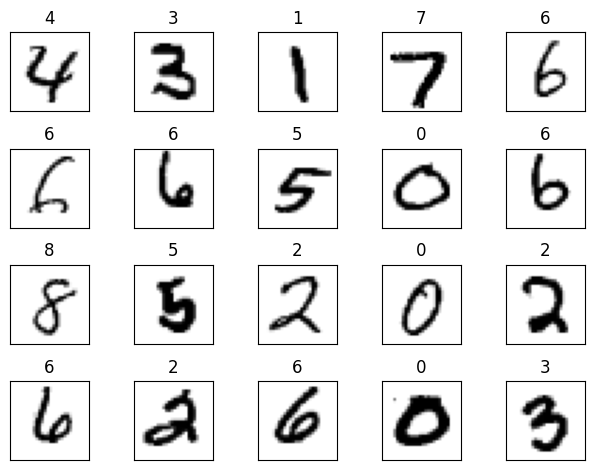

In [21]:
rand_idx = np.random.randint(0, len(y), 20)
for i, idx in enumerate(rand_idx):
    plt.subplot(4, 5, i + 1)
    plot_digit(X[idx])
    plt.title(y[idx])
plt.tight_layout()
plt.show()

Chuẩn bị dữ liệu huấn luyện và kiểm tra.

In [22]:
# Bộ dữ liệu đã tách sẵn 60000 train và 10000 test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

from sklearn.preprocessing import StandardScaler

# chuẩn hóa các đặc trưng để huấn luyện tốt hơn
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Yêu cầu 3 (2 đ)

1. Tìm hiểu khái niệm **confusion matrix**.

2. Huấn luyện bộ phân lớp Logistic Regression trên `X_train_std`, `y_train` và đánh giá trên `X_test_std`, `y_test` bằng confusion matrix.

3. Từ (2) cho biết kí số nào thường được dự đoán nhầm nhất thành kí số nào và vẽ một vài trường hợp đó ra và nhận xét.

1. Tìm hiểu khái niệm confusion matrix

Confusion matrix (ma trận nhầm lẫn) là một công cụ để đánh giá hiệu suất của mô hình phân loại, đặc biệt là trong bài toán phân loại nhiều lớp như MNIST. 
Confusion matrix biểu diễn số lượng mẫu mà mô hình dự đoán đúng và sai cho từng lớp.

Các thành phần của confusion matrix (với ví dụ 10 lớp cho MNIST):
- Trục dọc: Giá trị thực (nhãn đúng).
- Trục ngang: Dự đoán của mô hình.
- Mỗi ô (i, j) cho biết số mẫu thực tế là lớp i nhưng được dự đoán là lớp j.

2. Huấn luyện Logistic Regression và đánh giá bằng Confusion Matrix

Để thực hiện, trước tiên chúng ta chuẩn hóa dữ liệu bằng StandardScaler, sau đó huấn luyện mô hình Logistic Regression, và cuối cùng đánh giá bằng confusion matrix.

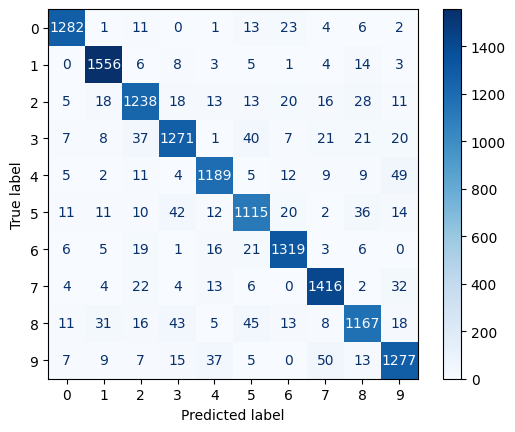

In [23]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tải và chia dữ liệu MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Huấn luyện Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_std, y_train)

# Dự đoán và tạo Confusion Matrix
y_pred = model.predict(X_test_std)
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.show()


3. Phân tích Confusion Matrix và Vẽ Các Trường Hợp Dự Đoán Nhầm

Kí số 9 thường bị dự đoán nhầm thành kí số 7.


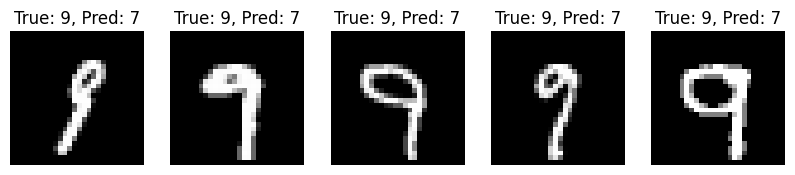

In [42]:
import random

# Tìm cặp kí số thường bị nhầm lẫn nhiều nhất
max_misclassified = np.unravel_index(np.argmax(conf_matrix - np.diag(np.diag(conf_matrix))), conf_matrix.shape)
true_digit, predicted_digit = max_misclassified
print(f"Kí số {true_digit} thường bị dự đoán nhầm thành kí số {predicted_digit}.")

# Lọc các hình ảnh bị nhầm giữa hai kí số và hiển thị một vài ví dụ
misclassified_indices = np.where((y_test == true_digit) & (y_pred == predicted_digit))[0]
num_samples = min(5, len(misclassified_indices))  # Chọn tối đa 5 mẫu để hiển thị

plt.figure(figsize=(10, 2))
for i, idx in enumerate(random.sample(list(misclassified_indices), num_samples)):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_digit}, Pred: {predicted_digit}")

plt.show()

### Yêu cầu 4 (2 đ)

1. Dùng k-Means gom cụm `X_train` thành 20 cụm.

2. Vẽ centroid của 20 cụm ở (1) và nhận xét.

3. Vẽ biểu đồ cho biết tỉ lệ các chữ số `y_train` trong từng cụm ở (1) và nhận xét.

In [31]:
from sklearn.cluster import KMeans

# Khởi tạo k-Means với 20 cụm
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_train)

# Lấy centroids của 20 cụm
centroids = kmeans.cluster_centers_


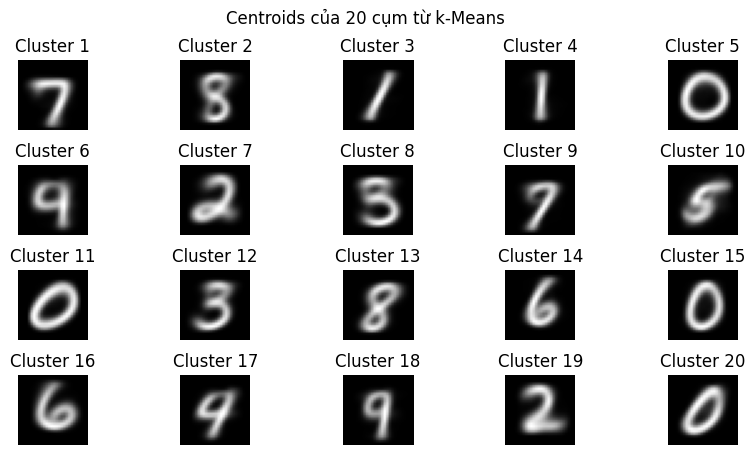

In [45]:
import matplotlib.pyplot as plt

# Hiển thị 20 centroids
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(centroids[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Cluster {i+1}")

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace và wspace giúp điều chỉnh khoảng cách dọc và ngang giữa các subplot

plt.suptitle("Centroids của 20 cụm từ k-Means")
plt.show()


Nhận xét về các Centroid
Các centroid này đại diện cho các đặc điểm chung của các chữ số trong mỗi cụm. 
Một số centroid có thể dễ nhận diện là các chữ số cụ thể (chẳng hạn như 0, 1, 8), 
trong khi một số khác có thể không rõ ràng, phản ánh sự đa dạng trong các cách viết hoặc độ nhiễu của dữ liệu.

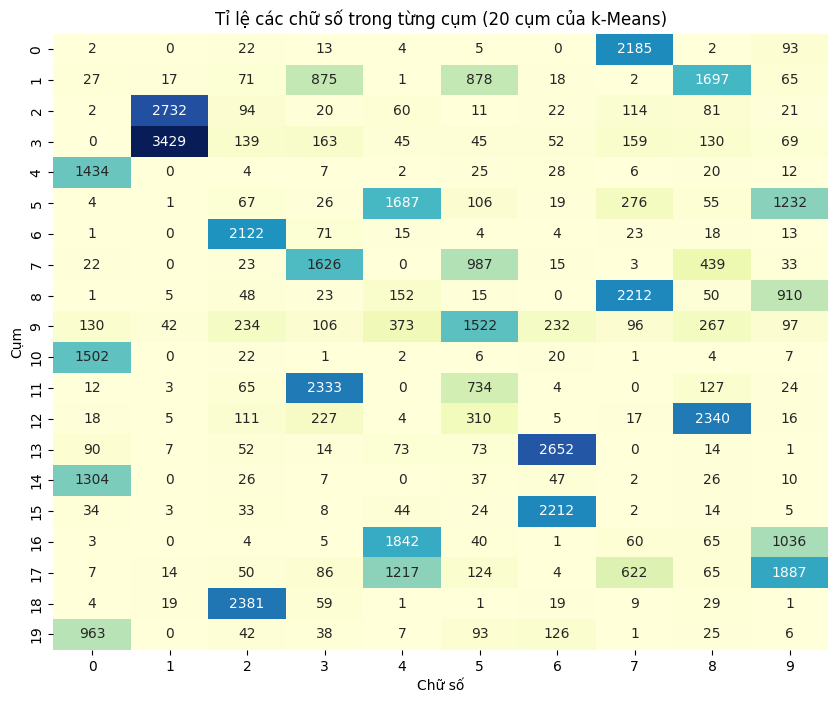

In [35]:
import pandas as pd
import seaborn as sns

# Dự đoán cụm cho mỗi mẫu trong X_train
cluster_labels = kmeans.predict(X_train)

# Tạo DataFrame để dễ dàng đếm số lượng chữ số trong từng cụm
df = pd.DataFrame({'Cluster': cluster_labels, 'Digit': y_train})

# Đếm số lượng từng chữ số trong mỗi cụm
digit_counts = df.groupby(['Cluster', 'Digit']).size().unstack(fill_value=0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(digit_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel("Chữ số")
plt.ylabel("Cụm")
plt.title("Tỉ lệ các chữ số trong từng cụm (20 cụm của k-Means)")
plt.show()

Dựa vào biểu đồ heatmap, chúng ta có thể đưa ra một số nhận xét sau:

1. Cụm có tính chất riêng biệt:

- Một số cụm có sự tập trung lớn của một chữ số cụ thể, ví dụ:
    - Cụm 3 chứa hầu hết là chữ số 1 với 3429 mẫu.
    - Cụm 2 chứa chủ yếu là chữ số 0 với 2732 mẫu.
    - Cụm 14 chứa chủ yếu là chữ số 6 với 2652 mẫu.
    - Cụm 19 chứa chủ yếu là chữ số 8 với 2381 mẫu.
Điều này cho thấy rằng k-Means có khả năng nhận diện một số chữ số với độ chính xác cao và nhóm chúng thành các cụm riêng biệt.

2. Cụm chứa nhiều chữ số khác nhau:

- Một số cụm có sự phân bố chữ số không đồng đều và chứa nhiều chữ số khác nhau. Ví dụ:
    - Cụm 12 có số lượng tương đối của các chữ số 1, 3, và 7, cho thấy rằng k-Means gặp khó khăn trong việc phân tách các chữ số có hình dạng tương tự (như 1 và 7).
    - Cụm 10 chứa số lượng lớn các chữ số 3, 5, và 9, điều này có thể do một số chữ số này có đặc điểm hình dạng tương tự hoặc bị nhầm lẫn.
3. Tính chất của các chữ số dễ nhầm lẫn:

- Một số chữ số có hình dạng dễ nhầm lẫn và do đó bị gom chung vào một cụm. Chẳng hạn:
    - Cụm 6 chứa nhiều chữ số 4 và 9, điều này cho thấy hình dạng của chữ số 4 và 9 có những đặc điểm tương đồng.
    - Cụm 17 chứa chữ số 5 và 8, có thể là do một số mẫu 5 và 8 có hình dạng tương đối giống nhau.

4. Kết luận tổng thể:

- K-Means có khả năng gom nhóm tốt với các chữ số dễ phân biệt như 0, 1, 6, và 8.
- Tuy nhiên, đối với các chữ số có hình dạng tương đồng hoặc bị nhòe, k-Means gặp khó khăn trong việc tách biệt chúng. Điều này dẫn đến các cụm chứa nhiều chữ số khác nhau, làm giảm hiệu quả phân loại.

Các kết quả này cho thấy rằng k-Means có thể được sử dụng để phân cụm sơ bộ, nhưng để phân loại chính xác các chữ số, chúng ta cần sử dụng các phương pháp phân loại có giám sát để xử lý vấn đề một cách hiệu quả hơn.